In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 95, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-01 1998-03-01 ... 2005-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980201 19980301 19980401 ... 20051101 20051201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [8]:
#interpolating to new lat and lon

#new_lon = np.arange(86,94,0.2007)
#new_lat = np.arange(18,28,0.034)
#jjas_data = jjas_data.interp(lat=new_lat,lon=new_lon)
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.36424097, 0.37230343, 0.37556937, ..., 0.9275374 , 0.8777441 ,
        0.7401172 ],
       [0.3488904 , 0.3580809 , 0.37171277, ..., 0.8381174 , 0.8546289 ,
        0.7661515 ],
       [0.35725656, 0.38105756, 0.38026428, ..., 0.7783064 , 0.7250169 ,
        0.7301341 ],
       ...,
       [0.30676398, 0.28645703, 0.2692595 , ..., 0.3147538 , 0.3260526 ,
        0.37545067],
       [0.31019294, 0.28211737, 0.25408417, ..., 0.2937004 , 0.295968  ,
        0.31669715],
       [0.27611408, 0.25033024, 0.2144223 , ..., 0.30539277, 0.3226247 ,
        0.3085496 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean*24
 


trmm = pr_mm

In [11]:
#opening the mpi data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MPI-ESM-MR/mpi_remap.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:15:56 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 95, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2005-11-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1998-01-01 1998-02-01 ... 2005-12-01
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:15:56 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [13]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lon: 32, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lon        (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-10-01
    pr         (time, lat, lon) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:15:56 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [14]:
#jjas_data.x.values
#jjas_data.y.values


In [15]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
#jjas_data

In [16]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[6.1864383e-05, 6.0977629e-05, 6.1668361e-05, ..., 7.1877141e-05,
        4.8116359e-05, 3.9137274e-05],
       [6.0200608e-05, 5.9324833e-05, 6.0061917e-05, ..., 7.8621895e-05,
        5.3723310e-05, 4.6506015e-05],
       [5.5235159e-05, 5.6216031e-05, 5.6117926e-05, ..., 9.4415154e-05,
        6.0927956e-05, 5.7215570e-05],
       ...,
       [1.6133061e-04, 1.8302686e-04, 2.0125108e-04, ..., 1.7975103e-04,
        1.8945294e-04, 1.6656371e-04],
       [1.5975394e-04, 1.7464062e-04, 1.9617532e-04, ..., 1.7315170e-04,
        2.2133742e-04, 2.2828119e-04],
       [1.8367330e-04, 3.0794190e-04, 4.6059032e-04, ..., 1.6944768e-04,
        2.3262140e-04, 2.6018670e-04]], dtype=float32)
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [17]:
mpi = jjas_mean*86400
mpi

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 5.34508266,  5.26846714,  5.32814639, ...,  6.21018496,
         4.1572534 ,  3.38146049],
       [ 5.20133249,  5.12566559,  5.18934962, ...,  6.79293175,
         4.64169398,  4.01811968],
       [ 4.77231777,  4.8570651 ,  4.84858879, ...,  8.15746933,
         5.26417539,  4.94342521],
       ...,
       [13.93896458, 15.81352064, 17.38809342, ..., 15.53048934,
        16.36873414, 14.39110455],
       [13.80274021, 15.08894954, 16.94954722, ..., 14.9603066 ,
        19.12355348, 19.72349491],
       [15.86937304, 26.60617987, 39.79500392, ..., 14.64027967,
        20.0984891 , 22.48013103]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [18]:
bias = mpi - trmm
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[ -3.39670049,  -3.66681462,  -3.68551881, ..., -16.05071172,
        -16.90860353, -14.38135308],
       [ -3.17203672,  -3.46827609,  -3.73175672, ..., -13.32188683,
        -15.86939916, -14.36951651],
       [ -3.80183994,  -4.28831683,  -4.27775398, ..., -10.52188438,
        -12.13623049, -12.57979485],
       ...,
       [  6.57662937,   8.93855212,  10.92586513, ...,   7.97639789,
          8.54347159,   5.38028798],
       [  6.35810959,   8.31813274,  10.85152715, ...,   7.91149708,
         12.02032158,  12.12276306],
       [  9.24263544,  20.59825388,  34.64886859, ...,   7.31085291,
         12.35549575,  15.07494057]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
bias_percentage = ((mpi - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[-38.85592254, -41.03748173, -40.88812626, ..., -72.10271874,
        -80.26544368, -80.96326084],
       [-37.88244185, -40.35722163, -41.83064945, ..., -66.22921692,
        -77.36983617, -78.1477095 ],
       [-44.34068128, -46.89051659, -46.87259821, ..., -56.32895304,
        -69.74682414, -71.78928764],
       ...,
       [ 89.32803505, 130.01589866, 169.07271954, ..., 105.59043313,
        109.17808241,  59.7092165 ],
       [ 85.40530632, 122.85272188, 177.95164674, ..., 112.23876944,
        169.22327379, 159.49468156],
       [139.47489711, 342.85132546, 673.29882273, ...,  99.74658512,
        159.57001618, 203.57262425]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

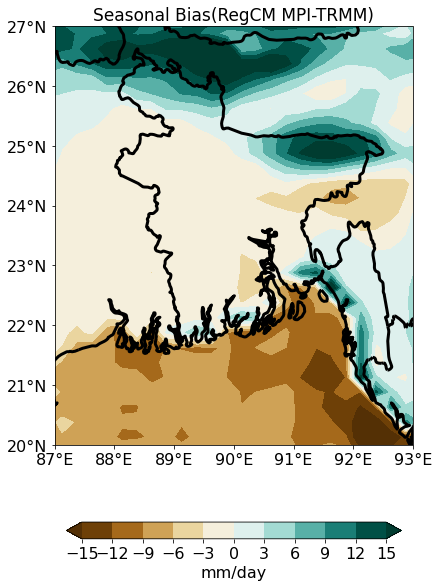

In [26]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),   transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(RegCM MPI-TRMM)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(mpi-trmm).png")



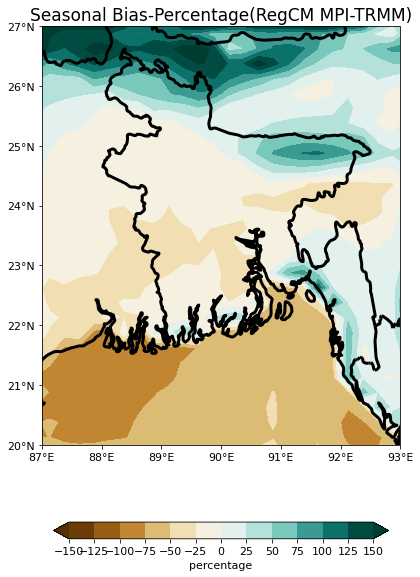

In [35]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

 

plt.title('Seasonal Bias-Percentage(RegCM MPI-TRMM)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(mpi-trmm).png")







In [22]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r